### Homework 5

In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("hmelq.csv")
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [5]:
df=df.dropna()

In [6]:
dms = pd.get_dummies(df[['reason','job']]) #convert to dummy
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [7]:
y = df["bad"]
X_ = df.drop(["bad", "reason", "job"], axis=1).astype("float64")
X_.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [8]:
XX=pd.concat([X_, dms[["reason_DebtCon", "job_Mgr", "job_Office", "job_Other", "job_ProfEx", "job_Sales"]]], axis=1)
XX.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,1,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,1,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,1,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,1,0,0,0,0


In [9]:
XX = pd.DataFrame(XX)
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.30, random_state= 42) 

In [10]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

d:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455445544554455

In [12]:
rf_params = {"max_depth": [2,5,8,10], "max_features": [2,5,8], "n_estimators": [10, 200, 500], "min_samples_split": [2,5,10]}

In [13]:

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=5)

In [14]:

rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.0min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [15]:
print("Best Parameters: " +str(rf_cv_model.best_params_))

Best Parameters: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 10}


In [16]:
rf_tuned = RandomForestClassifier(max_depth = 10, max_features= 5, min_samples_split=2, n_estimators=10)

In [17]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9521452145214522

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       554
           1       0.96      0.46      0.62        52

    accuracy                           0.95       606
   macro avg       0.96      0.73      0.80       606
weighted avg       0.95      0.95      0.94       606



In [20]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100}, index= X_train.columns)

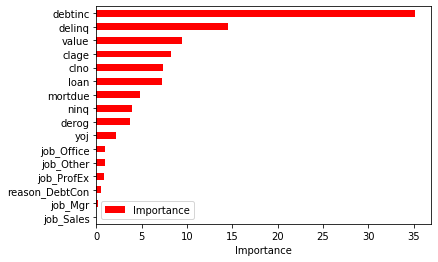

In [21]:
Importance.sort_values(by ="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Importance")
plt.show()

In [22]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [23]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455445544554455

In [24]:

gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05], "n_estimators" : [100, 200, 500], "max_depth": [3,5,10], "min_samples_split": [2,5,10]}

In [25]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs=-1, verbose=5)

In [ ]:
gbm_cv.fit(X_train, y_train)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       554
           1       0.85      0.44      0.58        52

    accuracy                           0.95       606
   macro avg       0.90      0.72      0.78       606
weighted avg       0.94      0.95      0.94       606

